In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
latent_space_size = 15

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [5]:
import autoencoder
import importlib
importlib.reload(autoencoder)


<module 'autoencoder' from 'c:\\Users\\jorgen\\Documents\\autoencoder\\autoencoder.py'>

In [6]:
    au = autoencoder.DenseAutoencoder(input_shape=(784,), layer_sizes=[128, 64, 32], latent_dim = latent_space_size)
    au.fit(x_train, epochs=10, batch_size=256)

    # decoded = au.predict(x_test)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                495       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1024      
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [7]:
encoded = au.encode(x_test)
decoded = au.decode(encoded)


In [8]:
print(encoded.shape)

(10000, 15)


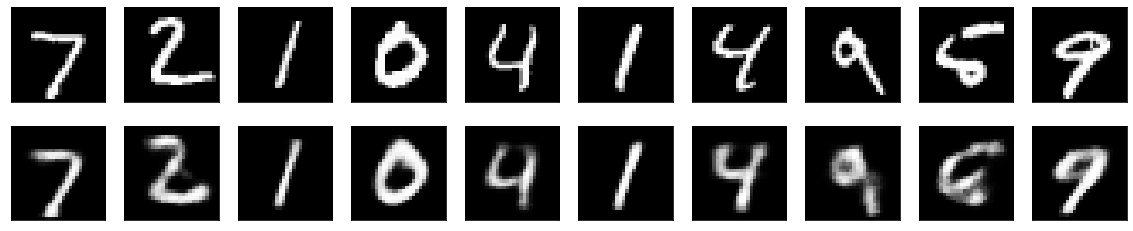

In [9]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
np.random.random((10, 1))


array([[0.25815576],
       [0.68072824],
       [0.14491802],
       [0.55401266],
       [0.77947124],
       [0.01824156],
       [0.18068116],
       [0.1726122 ],
       [0.66110469],
       [0.02400495]])

In [ ]:
start_img = encoded[0]
end_img = encoded[1]



In [71]:
encoded.shape

(10000, 15)

In [118]:
start_img = copy.copy(encoded[0])
end_img = copy.copy(encoded[1])

N_STEPS = 100
N_IMAGES = 10
step_sizes = (end_img - start_img) / N_STEPS


images = [start_img]

for i in range(N_IMAGES):
    start_img = copy.copy(encoded[i])
    end_img = copy.copy(encoded[i+1])

    step_sizes = (end_img - start_img) / N_STEPS

    for step in range(N_STEPS):
        start_img = start_img + step_sizes
        images.append(start_img)

images = np.array(images)
decoded_images = au.decode(images)
"""
for i in range(N_STEPS):
    start_img = start_img + step_sizes
    images.append(start_img)

images.append(end_img)

start_img = copy.copy(end_img)
end_img = copy.copy(encoded[2])

step_sizes = (end_img - start_img) / N_STEPS

for i in range(N_STEPS):
    start_img = start_img + step_sizes
    images.append(start_img)

images.append(end_img)
images = np.array(images)


images.shape"""

decoded_images = au.decode(images)

array([   0.      , -179.92633 ,    0.      ,    0.      ,    0.      ,
        781.2434  ,  241.19533 ,  149.79799 ,  444.30798 ,  180.86897 ,
        382.2905  ,  -56.358093,  202.82164 ,    0.      ,  -74.64589 ],
      dtype=float32)

In [119]:
decoded_images.shape

(1001, 784)

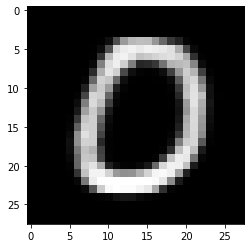

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


fig = plt.figure()


ims = []
for i in range(images.shape[0]):
    im = plt.imshow(decoded_images[i].reshape(28, 28), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=25, blit=True)

ani.save('dynamic_images.gif')

plt.show()
#HTML(ani.to_html5_video())

